In [249]:
import numpy as np
import zarr
import matplotlib.pyplot as plt
import pandas as pd


from dataset_util import get_agent_died_in_step

def deaths_per_step(z):

    deaths = []

    # print(deaths)
    for episode in range(0, len(z.attrs.get('EpisodeSteps'))):
        
        dead_in_steps = get_agent_died_in_step(z.attrs.get('EpisodeActions')[episode],
                                z.attrs.get('EpisodeDead')[episode]
        )
        deaths = np.append(deaths, dead_in_steps)
        # print("Episode: {}".format(episode))
        # print(dead_in_steps)


    print(deaths)

    plt.plot(deaths)

In [250]:
#z = zarr.open('/PommerLearn/1M_simple_0.zr', 'r')
amountOfZarrs = 3
zarrs = [] 
zarrs.append(zarr.open('/PommerLearn/1M_simple_0.zr', 'r'))
zarrs.append(zarr.open('/data/1M_mcts_ffa_0.zr', 'r'))
#zarrs.append(zarr.open('/data/1M_mcts_vs_mcts_ffa_with_Raw_Net_0.zr', 'r'))
zarrs.append(zarr.open('/data/1M_mcts_vs_mcts_ffa_0.zr', 'r'))



In [251]:
deaths = [[]*amountOfZarrs for i in range(amountOfZarrs)]


for idx, zarr in enumerate(zarrs):
        for episode in range(0, len(zarr.attrs.get('EpisodeSteps'))):
                
                dead_in_steps = get_agent_died_in_step(zarr.attrs.get('EpisodeActions')[episode],
                                        zarr.attrs.get('EpisodeDead')[episode]
                )
                deaths[idx] = np.append(deaths[idx], dead_in_steps)
                # print("Episode: {}".format(episode))
                # print(dead_in_steps)

print(deaths)

[array([22.,  0.,  0., ..., 63., 90.,  0.]), array([  0.,  41., 130., ...,  68.,  22., 372.]), array([  0.,   0.,   0., ...,   0., 576.,   0.])]


In [252]:
df = pd.DataFrame(data=deaths)
df = df.transpose()
df

,0,1,2
0,22.0,0.0,0.0
1,0.0,41.0,0.0
2,0.0,130.0,0.0
3,172.0,276.0,0.0
4,13.0,148.0,0.0
...,...,...,...
14347,NaN,23.0,NaN
14348,NaN,0.0,NaN
14349,NaN,68.0,NaN
14350,NaN,22.0,NaN


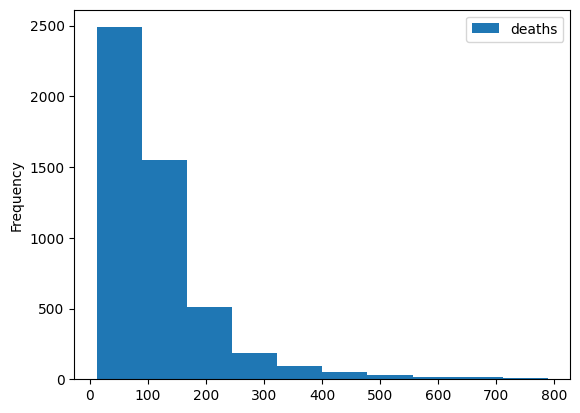

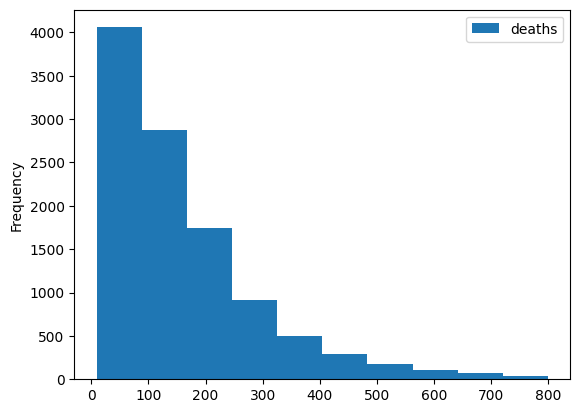

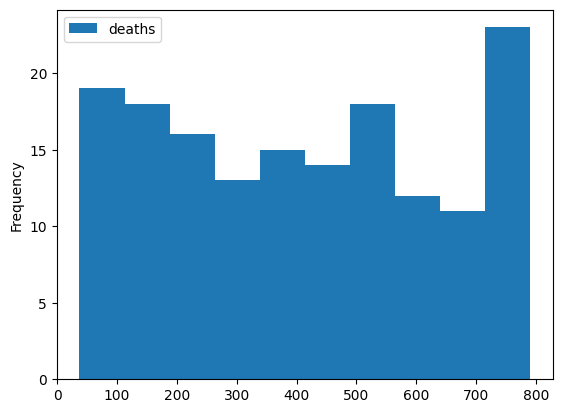

In [281]:
for i in range(amountOfZarrs):
    df2 = pd.DataFrame({
        #replace to remove survivors
        "deaths": df[i].replace(0.0, np.nan),

    })
    #df2 = df2.drop([0])
    df2.plot(kind='hist')
    # print(df2)


In [254]:
df2.max


<bound method NDFrame._add_numeric_operations.<locals>.max of        deaths
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
...       ...
14347     NaN
14348     NaN
14349     NaN
14350     NaN
14351     NaN

[14351 rows x 1 columns]>

In [259]:
df2.drop([0])

KeyError: '[0] not found in axis'

<AxesSubplot:ylabel='Frequency'>

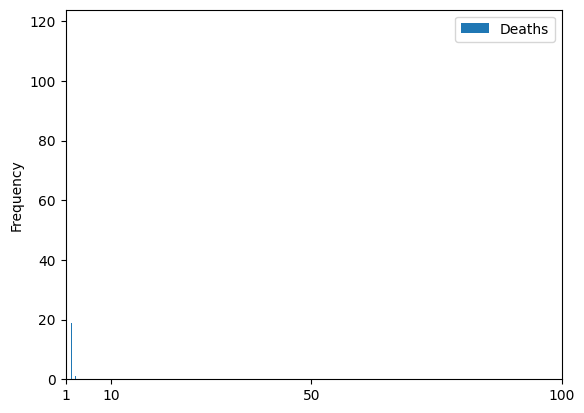

In [ ]:
df2.drop([0]).plot(kind='hist', xticks=[1,10, 50, 100])

<AxesSubplot:ylabel='Frequency'>

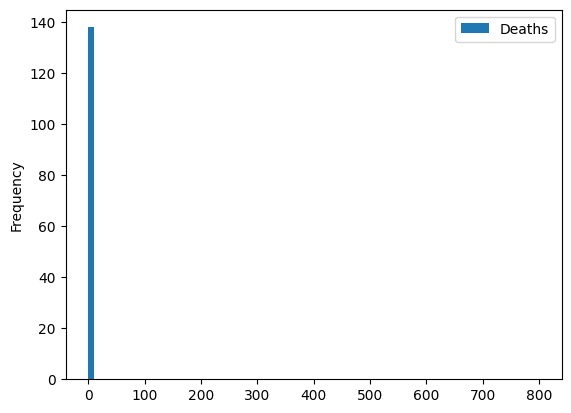

In [ ]:
custom_bins = range(0,801,10)
df2.drop([0]).plot(kind='hist', bins=custom_bins)

In [ ]:
from dataset_util import get_agent_episode_slice

episode_slice = get_agent_episode_slice(zarrs[0],1)

obs = zarrs[0]['obs'][episode_slice]

In [ ]:
arr = np.zeros((800))

for episode in range(0, len(zarrs[0].attrs.get('EpisodeSteps'))):
        
        dead_in_steps = get_agent_died_in_step(z.attrs.get('EpisodeActions')[episode],
                                zarrs[0].attrs.get('EpisodeDead')[episode]
        )
        max = 0
        for i in range(0,3):
            if dead_in_steps[i]==0:
                winner_index=i
                break
            elif dead_in_steps[i] > max:
                max = dead_in_steps[i]
                winner_index=i

        agent_episode = episode*4 + winner_index

        episode_slice = get_agent_episode_slice(z,agent_episode)

        obs = zarrs[0]['obs'][episode_slice]

        boxes = np.sum(np.sum(obs[:,1,:,:], axis=2), axis=1)
        boxes = np.pad(boxes, (0, 800-boxes.size), mode='edge')

        arr = np.column_stack((arr, boxes))
        
arr = np.delete(arr, 0,1)

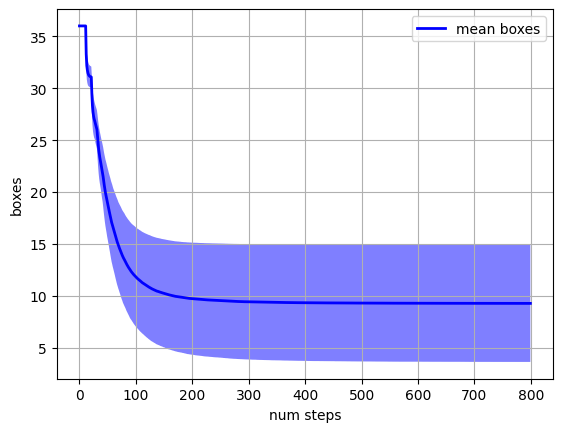

In [ ]:
t=np.arange(800)


mean_boxes = arr.mean(axis=1)
sigma_boxes = arr.std(axis=1)


fig, ax = plt.subplots(1)
ax.plot(t, mean_boxes, lw=2, label='mean boxes', color='blue')
ax.fill_between(t, mean_boxes+sigma_boxes, mean_boxes-sigma_boxes, facecolor='blue', alpha=0.5)
ax.legend(loc='upper right')
ax.set_xlabel('num steps')
ax.set_ylabel('boxes')
ax.grid()


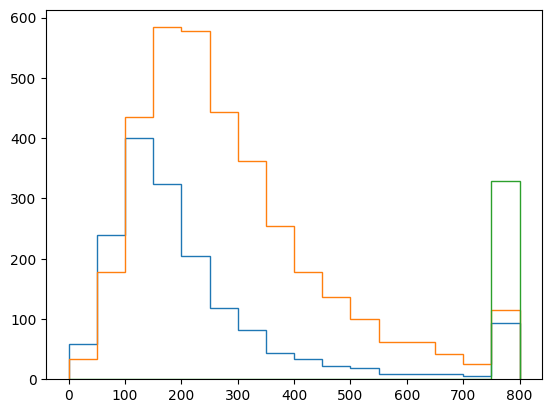

In [ ]:
for zarr in zarrs:
    plt.hist(zarr.attrs.get('EpisodeSteps'), bins= range(0,801,50), histtype='step', fill=False)

In [ ]:
episode_slice = get_agent_episode_slice(zarrs[0],1)
obs = zarrs[0]['obs'][episode_slice]
arr = np.zeros((800))


for episode in range(0, len(zarrs[0].attrs.get('EpisodeSteps'))):
        
        dead_in_steps = get_agent_died_in_step(z.attrs.get('EpisodeActions')[episode],
                                zarrs[0].attrs.get('EpisodeDead')[episode]
        )
        max = 0
        for i in range(0,3):
            if dead_in_steps[i]==0:
                winner_index=i
                break
            elif dead_in_steps[i] > max:
                max = dead_in_steps[i]
                winner_index=i

        agent_episode = episode*4 + winner_index

        episode_slice = get_agent_episode_slice(z,agent_episode)

        obs = zarrs[0]['obs'][episode_slice]

        boxes = np.sum(np.sum(obs[:,1,:,:], axis=2), axis=1)
        boxes = np.pad(boxes, (0, 800-boxes.size), mode='edge')

        arr = np.column_stack((arr, boxes))
        
arr = np.delete(arr, 0,1)